# House rent prediction
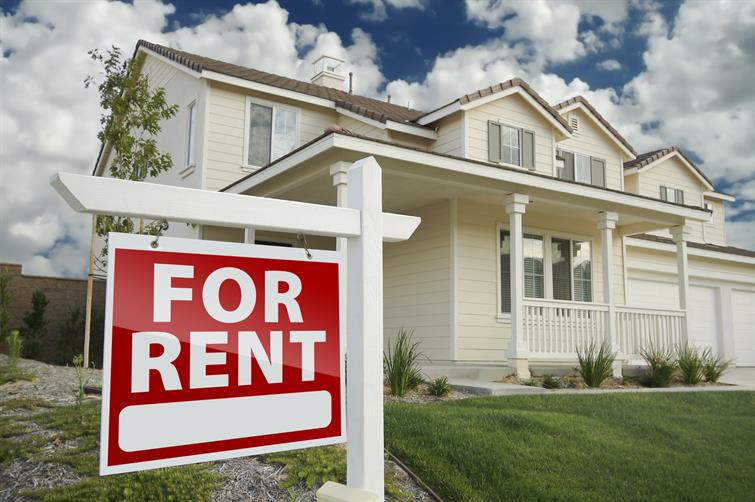

### Project Goals
using Pyhon i intend to achieve the following goals:

1. EDA and Clean data
2. Statistically summarise data
3. Distribution plots
4. Relationship plots (Size vs rent, Area type vs rent, Funishing-status)
5. feature engineering: scaling(Bathroom, Size), Encoding categorical data. 
6. Machine learning: Refression models (Knn,linear..)
7. Model evaluation
8. Conclusion. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("House_Rent_Dataset.csv")

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Exploratory Data analysis

In [4]:
df.shape

(4746, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


#### Statistical discription:

Statistical summary of data shows that there are 4 actual numerical data in the rent dataset. Describe function in pandas by default will produce stattistical summary of numerical datas. On a first glance the numerical datas are all skwed, with size and bathroom data been highly skwed with their mean and median been significantly diffrence conpared to BHK and rent. 

#### Result:
This statistical summary table provides descriptive statistics for four variables: BHK (number of bedrooms), Rent, Size (area of the property), and Bathroom (number of bathrooms). Here's an explanation of each statistic:

1. count: This indicates the number of observations (rows) for each variable.  Result suggest there are 4746 observations for each variable in this dataset.

2. mean (average): This is the average value of each variable. Result showns the average number of bedrooms (BHK) is approximately 2.08, the avearage rent is approximately 34,993.45, the mean size is approximately 967.49, and the mean number of bathrooms is approximately 1.97.

3. std (standard deviation): This measures the dispersion or spread of the values around the mean. A higher standard deviation indicates greater variability. For example, the standard deviation for BHK is approximately 0.83, for rent it's approximately 78,106.41, for size it's approximately 634.20, and for bathrooms it's approximately 0.88.

4. min: This represents the minimum value observed for each variable. The minimum number of bedrooms is 1, the minimum rent is 1200, the minimum size is 10, and the minimum number of bathrooms is 1.

5. 25% (Q1): This is the first quartile or 25th percentile, indicating the value below which 25% of the observations fall. For example, 25% of the properties have 2 bedrooms or fewer, 25% of the rents are 10,000 or lower, 25% of the sizes are 550 or lower, and 25% of the properties have 1 bathroom or fewer.

6. 50% (median or Q2): This is the median or 50th percentile, indicating the value below which 50% of the observations fall. For example, 50% of the properties have 2 bedrooms or fewer, 50% of the rents are 16,000 or lower, 50% of the sizes are 850 or lower, and 50% of the properties have 2 bathrooms or fewer.

8. 75% (Q3): This is the third quartile or 75th percentile, indicating the value below which 75% of the observations fall. For example, 75% of the properties have 3 bedrooms or fewer, 75% of the rents are 33,000 or lower, 75% of the sizes are 1200 or lower, and 75% of the properties have 2 bathrooms or fewer.

9. max: This represents the maximum value observed for each variable. For example, the maximum number of bedrooms is 6, the maximum rent is 3,500,000, the maximum size is 8000, and the maximum number of bathrooms is 10.

These statistics provide insights into the central tendency, dispersion, and distribution of the data for each variable in the dataset.

In [8]:
df.isnull()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,False,False,False,False,False,False,False,False,False,False,False,False
4742,False,False,False,False,False,False,False,False,False,False,False,False
4743,False,False,False,False,False,False,False,False,False,False,False,False
4744,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum() 

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4741    False
4742    False
4743    False
4744    False
4745    False
Length: 4746, dtype: bool

In [11]:
df.duplicated().sum()

0

#### Summaring categorical data

In [12]:
df.describe(include= object)

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


Adding include object to the describe syntax will give the frequency and count summary of the categorical data. 

### EDA Visualisation using:
1. Matplotlib
2. Seaborn

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


### Box-plot: 
Boxplot is used in explratory data analysis to visualise the distribution of variance within the variables in a dataset. It is particularly useful in visualising out of range datas called outlirs within a distribution.

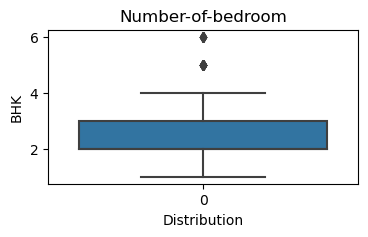

In [31]:
plt.figure(figsize=(4,2))
sns.boxplot(data=df["BHK"])
plt.xlabel('Distribution')
plt.ylabel('BHK')
plt.title('Number-of-bedroom')
plt.show()

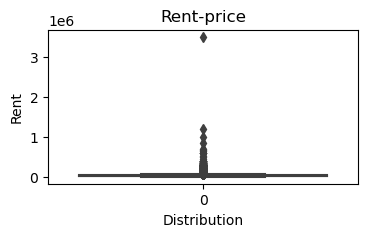

In [26]:
plt.figure(figsize=(4,2))
sns.boxplot(data=df["Rent"])
plt.xlabel('Distribution')
plt.ylabel('Rent')
plt.title('Rent-price')
plt.show()

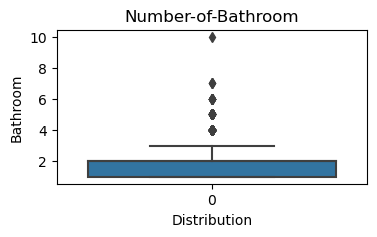

In [25]:
plt.figure(figsize=(4,2))
sns.boxplot(data=df["Bathroom"])
plt.xlabel('Distribution')
plt.ylabel('Bathroom')
plt.title('Number-of-Bathroom')
plt.show()

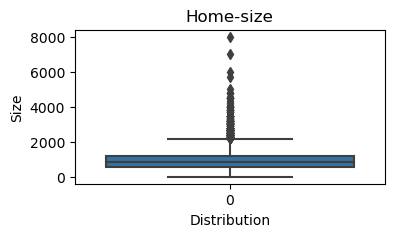

In [32]:
plt.figure(figsize=(4,2))
sns.boxplot(data=df["Size"])
plt.xlabel('Distribution')
plt.ylabel('Size')
plt.title('Home-size')
plt.show()

As shown in the boxplots ofnumerical datas, result shows that all the numerical values has significant outliers. This is consistent with the high range of data seen in the statistical summary. Outliers means theat theree are observtions that do not follow the distribution of most of the other viriance within the first, second and third interquartile range which represent (25, 50 and 75)% of the entire distibuton respectively. 
#### Why box-plot?
Having a visual and conceptual understand of the data distribution, informs me on what preparatory processes is imperative for this data to produce a relaiabe model prediction. Remember if gabbage data is used to train and test model, the algarithm will produces inaccurate or to say the least biase outcomes/predictions. 

#### Distribution plot (Histogram-curve)
The histogram plot is used in EDA to display how the variance of data variables is distributed under the bell-curve. It is particularly useful in visualising the variance of data relative to the mean, and the position of the mean, median, mode.  

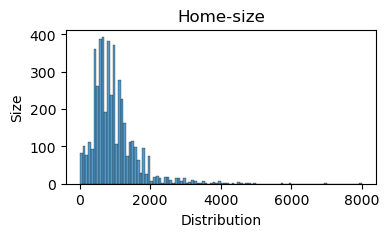

In [18]:
plt.figure(figsize=(4,2))
sns.histplot(data=df["Size"])
plt.xlabel('Distribution')
plt.ylabel('Size')
plt.title('Home-size')
plt.show()

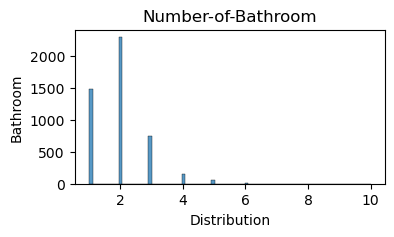

In [19]:
plt.figure(figsize=(4,2))
sns.histplot(data=df["Bathroom"])
plt.xlabel('Distribution')
plt.ylabel('Bathroom')
plt.title('Number-of-Bathroom')
plt.show()

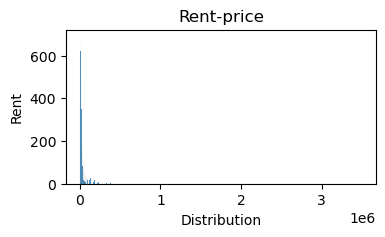

In [22]:
plt.figure(figsize=(4,2))
sns.histplot(data=df["Rent"])
plt.xlabel('Distribution')
plt.ylabel('Rent')
plt.title('Rent-price')
plt.show()

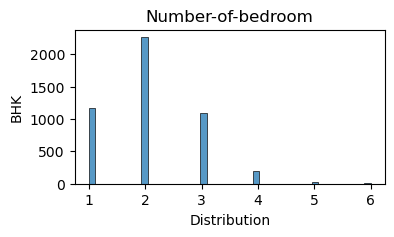

In [21]:
plt.figure(figsize=(4,2))
sns.histplot(data=df["BHK"])
plt.xlabel('Distribution')
plt.ylabel('BHK')
plt.title('Number-of-bedroom')
plt.show()

### Result distribution plot
As shown in the the variables that have large std have wide dispersion fro example 'number-of-bedroom' and 'number of bathroom' and variables with small std have very tight vairance. The mode is the modt frequent observation, athe medain and mean in a guassian distribution should be on the same position as the mode. 